#**CS6140 - Machine Learning, Spring 2024**
##**Homework 2**

Submission Instructions:
- Please complete this homework assignment in the same notebook provided.
- Submit your completed assignment on Canvas by the deadline.

Submission Deadline:
**Feb 23th, 2024**

<p align="justify">
Please read the instructions carefully when answering questions and ensure your code works correctly before submission. The grader will run your code for grading the coding questions.
</p>

This homework has two parts:
1. In the first part, you are required to implement a linear regression and report the metrics.
2. In the second part, you need to implemet supervised learning methods for a classification problem.

In [1]:
#@markdown ### Enter your first and last names below:
# First Name = "Vijay" #@param {type:"string"}
# Last Name = "Venkatesan" #@param {type:"string"}

#**Part one: Comparing Models for Home Prices**

Real estate websites like Zillow use models to estimate US home prices, aiding buyers and sellers. The dataset contains 76 home sales near Seattle, with features like price, size, bedrooms, bathrooms, construction year, and garage size. A data scientist aims to compare two regression models: simple linear (square footage) and multiple linear (size, year, bedrooms, bathrooms, garage). Interaction and polynomial terms are excluded. Models will be trained on one set and tested on another.  


**Import the home prices dataset and fit two house price prediction models (a simple and a multiple linear regression models), and calculate metrics: RMSE, MAE and R-squared for each model**

In [2]:
# Import required packages and functions

# YOUR CODE GOES HERE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Set seed and test proportion
seed = 123
test_p = 0.20

# Import data
homes = pd.read_csv('https://raw.githubusercontent.com/mh2t/CS6140/main/data/homes.csv').dropna()

homes

,ID,Price,Floor,Lot,Bath,Bed,BathBed,Year,Age,AgeSq,Gar,Status,DAc,School,DEd,DHa,DAd,DCr,DPa
0,1,388.0,2.180,4,3.0,4,12.0,1940,-3.0,9.00,0,Sold,0,Edison,1,0,0,0,0
1,2,450.0,2.054,5,3.0,4,12.0,1957,-1.3,1.69,2,Sold,0,Edison,1,0,0,0,0
2,3,386.0,2.112,5,2.0,4,8.0,1955,-1.5,2.25,2,Sold,0,Edison,1,0,0,0,0
3,4,350.0,1.442,6,1.0,2,2.0,1956,-1.4,1.96,1,Active,1,Adams,0,0,1,0,0
4,5,155.5,1.800,1,2.0,4,8.0,1994,2.4,5.76,1,Sold,0,Adams,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,249.9,2.081,5,2.1,4,8.4,1970,0.0,0.00,1,Sold,0,Harris,0,1,0,0,0
72,73,215.0,2.044,1,1.1,4,4.4,1936,-3.4,11.56,0,Sold,0,Parker,0,0,0,0,1
73,74,435.0,2.253,11,2.0,3,6.0,1979,0.9,0.81,2,Sold,0,Redwood,0,0,0,0,0
74,75,274.9,1.861,4,2.0,4,8.0,1995,2.5,6.25,2,Active,1,Parker,0,0,0,0,1


In [3]:
# Linear regression model

# Define input and output features
X = homes[['Floor']]
y = homes[['Price']]

# Create training and testing data

# YOUR CODE GOES HERE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
R_squared = r2_score(y_test, predictions)

print(f'MSE = {MSE}')
print(f'MAE = {MAE}')
print(f'R-squared = {R_squared}')


# Metrics for simple linear regression

# YOUR CODE GOES HERE

MSE = 4377.548634520407
MAE = 53.026467960776785
R-squared = 0.07881601353080447


In [4]:
# Multiple regression model

# Define input and output features
X = homes[['Floor', 'Bath', 'Bed', 'Year', 'Gar']]
y = homes[['Price']]

# Create training and testing data

# YOUR CODE GOES HERE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

multiple_linear_model = LinearRegression()

multiple_linear_model.fit(X_train, y_train)

predictions = multiple_linear_model.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
R_squared = r2_score(y_test, predictions)

print(f'MSE = {MSE}')
print(f'MAE = {MAE}')
print(f'R-squared = {R_squared}')


# Metrics for multiple regression

# YOUR CODE GOES HERE

MSE = 4033.191050802187
MAE = 51.55650002967879
R-squared = 0.1512804721181854


**Cross-validation with Regression Models**  

**Perform cross-validation to assess both linear and multiple regression models.**


In [5]:
# Fit simple linear regression model

X = homes[['Floor']]
y = homes[['Price']]

# YOUR CODE GOES HERE

# 10-fold cross-validation scores

k_fold_scores_linear_model = -1 * cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
print(k_fold_scores_linear_model)
print()

# YOUR CODE GOES HERE

# Leave-one-out cross-validation scores

loo_scores_linear_model = -1 * cross_val_score(model, X, y, cv=X.shape[0], scoring='neg_mean_squared_error')
print(loo_scores_linear_model)
print()


# YOUR CODE GOES HERE

[10074.31609316  2001.67111917  2294.94898715  2324.13492867
  2144.58219492  3077.00440629  4152.18175792  2462.94515929
  3111.33204993  4076.13578897]

[8.58080910e+03 2.62067002e+04 8.81602291e+03 1.09047560e+04
 1.51844943e+04 4.40379985e+03 1.39568504e+03 9.73497806e+03
 1.77195323e+02 2.00120825e+03 3.94015763e+03 9.44770681e+02
 2.42890415e+02 3.88709302e+03 1.64013466e+03 3.18114920e+03
 1.14943188e+01 2.44144782e+02 3.78790613e+02 5.68680538e+02
 1.44321851e+02 9.23330984e+03 3.37456831e+03 4.37082047e+03
 1.01650981e+04 9.24310789e+02 5.73384340e+02 2.43135446e+03
 7.26343360e+02 6.84725328e+01 3.52439327e+03 1.26791706e+02
 2.45320740e+03 5.65969927e+03 8.42268366e+02 5.18884989e+01
 1.38654975e+03 1.90868727e+03 1.40692580e+03 3.76914816e+03
 2.72049441e+02 4.10887225e+03 6.94913721e+03 7.14977549e-01
 1.13091430e+03 8.82907347e+03 2.54185414e+03 1.23232711e+01
 3.59129984e+01 2.96152499e+03 8.21813359e+03 1.10295023e+04
 5.38017294e+03 3.46571811e+02 1.17866321e+03 4.1419

In [6]:
# Fit multiple regression model

X = homes[['Floor', 'Bath', 'Bed', 'Year', 'Gar']]
y = homes[['Price']]

# YOUR CODE GOES HERE

# 10-fold cross-validation scores

k_fold_scores_multiple_linear_model = -1 * cross_val_score(multiple_linear_model, X, y, cv=10, scoring='neg_mean_squared_error')
print(k_fold_scores_multiple_linear_model)
print()

# YOUR CODE GOES HERE

# Leave-one-out cross-validation scores

loo_scores_multiple_linear_model = -1 * cross_val_score(multiple_linear_model, X, y, cv=X.shape[0], scoring='neg_mean_squared_error')
print(loo_scores_multiple_linear_model)
print()

# YOUR CODE GOES HERE

[10046.5057028   1555.19190238  1092.06576274  3588.58934671
  3672.39414537  1707.44869745  4115.37201093  1740.58463394
  2196.35287892  3872.04849828]

[1.70002962e+04 2.51514528e+04 9.67770596e+03 8.77604807e+03
 7.84942980e+03 6.51399268e+03 2.36497488e-01 9.52607633e+03
 8.56396410e+01 4.27372572e+03 2.14898804e+03 6.69723508e+02
 9.37552707e+02 3.52999638e+03 9.09246879e+02 7.20877434e+02
 9.04096414e+01 6.43651816e+00 1.04635145e+01 6.08574563e+01
 3.11684127e+03 9.15729701e+02 3.10899240e+02 3.83883282e+03
 1.50902177e+04 2.83248548e+03 2.72736996e+02 2.00186166e+03
 2.54485040e+03 7.08480676e+02 3.49142751e+03 6.67462041e+02
 5.03564172e+03 2.52554155e+03 3.72622514e+03 2.73587128e+03
 9.68966479e+02 4.39975800e+03 1.29907042e+03 3.92595549e+03
 4.85489658e+02 2.15456871e+03 3.30709578e+03 8.06135726e-03
 7.02169461e+02 5.82825250e+03 1.30972732e+01 1.24657256e+01
 1.74177909e+03 1.37364169e+03 1.74552328e+03 1.21074493e+04
 6.39419228e+03 3.30030917e+02 5.99624651e+03 2.2894

In [7]:
# Combine cross-validation results into a single dataframe

# YOUR CODE GOES HERE

combined_cross_validation_scores = np.concatenate((k_fold_scores_linear_model, 
                                                  loo_scores_linear_model,
                                                  k_fold_scores_multiple_linear_model, 
                                                  loo_scores_multiple_linear_model))


model_linear = np.array([])
model_multiple = np.array([])

for i in range(combined_cross_validation_scores.shape[0] // 2):

    model_linear = np.append(model_linear, ['Linear'])
    model_multiple = np.append(model_multiple, ['Multiple'])

combined_models = np.concatenate((model_linear, model_multiple))

k = 10
k_fold_cv = np.array([])
loo_cv = np.array([])


for i in range(k):
   
  k_fold_cv = np.append(k_fold_cv, ['10-fold'])

# print(k_fold_cv)

for i in range(combined_cross_validation_scores.shape[0] // 2 - k):
   
  loo_cv = np.append(loo_cv, ['LOOCV'])

combined_cvs = np.concatenate((k_fold_cv, loo_cv, k_fold_cv, loo_cv))

results = pd.DataFrame({'MSE': combined_cross_validation_scores, 
                        'Model': combined_models, 
                        'CV': combined_cvs})
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(results)

              MSE     Model       CV
0    10074.316093    Linear  10-fold
1     2001.671119    Linear  10-fold
2     2294.948987    Linear  10-fold
3     2324.134929    Linear  10-fold
4     2144.582195    Linear  10-fold
5     3077.004406    Linear  10-fold
6     4152.181758    Linear  10-fold
7     2462.945159    Linear  10-fold
8     3111.332050    Linear  10-fold
9     4076.135789    Linear  10-fold
10    8580.809100    Linear    LOOCV
11   26206.700200    Linear    LOOCV
12    8816.022914    Linear    LOOCV
13   10904.756031    Linear    LOOCV
14   15184.494251    Linear    LOOCV
15    4403.799846    Linear    LOOCV
16    1395.685040    Linear    LOOCV
17    9734.978061    Linear    LOOCV
18     177.195323    Linear    LOOCV
19    2001.208252    Linear    LOOCV
20    3940.157629    Linear    LOOCV
21     944.770681    Linear    LOOCV
22     242.890415    Linear    LOOCV
23    3887.093024    Linear    LOOCV
24    1640.134659    Linear    LOOCV
25    3181.149195    Linear    LOOCV
2

<Figure size 800x400 with 0 Axes>

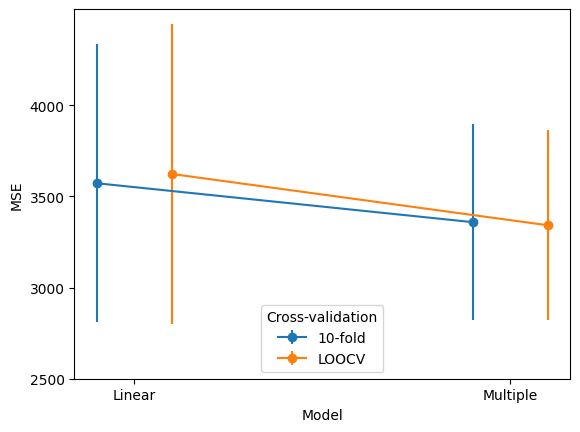

In [8]:
plt.figure(figsize=(8, 4))

# Plot error bars

# YOUR CODE GOES HERE

part_1 = results.iloc[:10, [0, 1, 2]]

part_2 = results.iloc[10:86, [0, 1, 2]]

part_3 = results.iloc[86:96, [0, 1, 2]]

part_4 = results.iloc[96:, [0, 1, 2]]

moe_part_1 = part_1['MSE'].sem()
moe_part_2 = part_2['MSE'].sem()
moe_part_3 = part_3['MSE'].sem()
moe_part_4 = part_4['MSE'].sem()

mean_part_1 = part_1['MSE'].mean()
mean_part_2 = part_2['MSE'].mean()
mean_part_3 = part_3['MSE'].mean()
mean_part_4 = part_4['MSE'].mean()

a = ['Linear', 'Multiple']
b = [mean_part_1, mean_part_3]

c = ['Linear', 'Multiple']
d = [mean_part_2, mean_part_4]


df_1 = pd.DataFrame({'Model' : a, 'Mean' : b})
df_2 = pd.DataFrame({'Model' : c, 'Mean' : d})

fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(0.1, 0.0) + ax.transData

er1 = ax.errorbar(df_1['Model'], df_1['Mean'], yerr=[moe_part_1, moe_part_2], marker="o", transform=trans1)

er2 = ax.errorbar(df_2['Model'], df_2['Mean'], yerr=[moe_part_3, moe_part_4], marker="o", transform=trans2)

plt.xlabel('Model')
plt.ylabel('MSE')

plt.yticks(np.arange(2500, 4500, 500))
plt.legend(["10-fold", "LOOCV"], loc='lower center', title='Cross-validation')

plt.show()


#**Part Two: Classifying Cells**


Breast cancer is a significant concern in the US, with around 270,000 annual diagnoses and remaining a leading cause of cancer-related death among women. Detecting lumps prompts further tests, such as biopsies, to determine malignancy and potential treatments. While most breast lumps are non-cancerous, malignant lumps require treatment to prevent metastasis and are distinguishable from benign lumps.  

**Wisconsin Breast Cancer Database**  


The Wisconsin Breast Cancer Database comprises 569 cell scans from breast tissue biopsies. Utilizing image recognition, features like cell radius, perimeter, and texture were computed to describe cell shape and texture. The dataset also specifies whether samples are benign or malignant, enabling supervised learning. Malignant cells are labeled as `Diagnosis=1`, while benign cells are marked as `Diagnosis=0`.  

The Python code below imports the breast cancer dataset and encodes the target column to a binary response variable.

In [9]:
# Import required packages and functions

# YOUR CODE GOES HERE


seed = 123

cancer = pd.read_csv('https://raw.githubusercontent.com/mh2t/CS6140/main/data/WisconsinBreastCancerDatabase.csv').dropna()
cancer = cancer.replace(to_replace=['M', 'B'], value=[int(1), int(0)])
cancer

,ID,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave points worst,Symmetry worst,Fractal dimension worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**K-nearest Neighbors Classification Based on Radius and Texture**  


Researchers intend to create a model using radius and texture as input features, simplifying the process for visualizing the decision boundary. Decision boundaries separate classes and are depicted on a scatter plot with varying shading indicating classifications in different regions. This aids in exploring predictions and model behavior adjustments. Taking k-nearest neighbors as an example, alterations in k impact the decision boundary and model performance, prompting investigation.  

**Your task is to fit k-nearest neighbors for classification with k=3, 7, and 11 to a training set.**

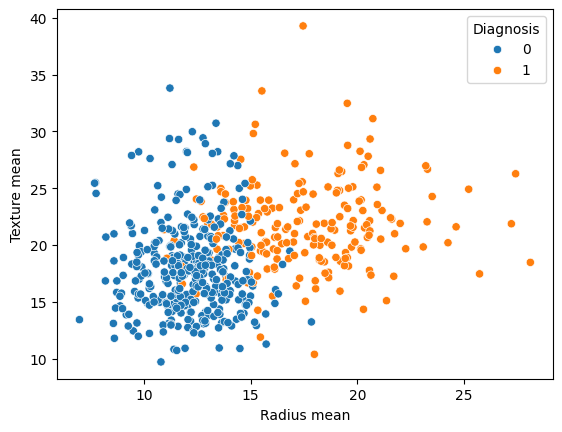

In [10]:
# Visual exploration

# YOUR CODE GOES HERE

sns.scatterplot(data=cancer, x='Radius mean', y='Texture mean', hue='Diagnosis')

plt.show()

In [11]:
# # Define input and output features based on the scatterplot variables.

# # YOUR CODE GOES HERE

X = cancer.iloc[:, [2, 3]]
y = cancer.iloc[:, [1]]

# # Create training and testing data

# # YOUR CODE GOES HERE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# # Scale the input features

# # YOUR CODE GOES HERE

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)


c:\Users\vijay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


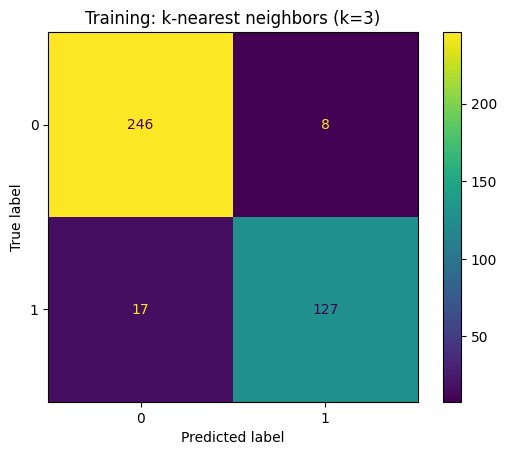

Accuracy: 0.9371859296482412
Precision: 0.9407407407407408
Recall: 0.8819444444444444


In [12]:
# # Fit k-nearest neighbors with k=3

# # YOUR CODE GOES HERE

clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train_scaled, y_train)

predictions = clf.predict(X_train_scaled)

# # # # Confusion matrix

# # # # YOUR CODE GOES HERE

cm = confusion_matrix(y_train, predictions)

cmTrain_plot = ConfusionMatrixDisplay(cm)

cmTrain_plot.plot()
cmTrain_plot.ax_.set_title("Training: k-nearest neighbors (k=3)")
plt.show()

# # # # Calculate accuracy, precision, and recall

# # # # YOUR CODE GOES HERE

TN, FP, FN, TP = cm.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision =  TP / (TP + FP)
recall =  TP / (TP + FN)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

c:\Users\vijay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


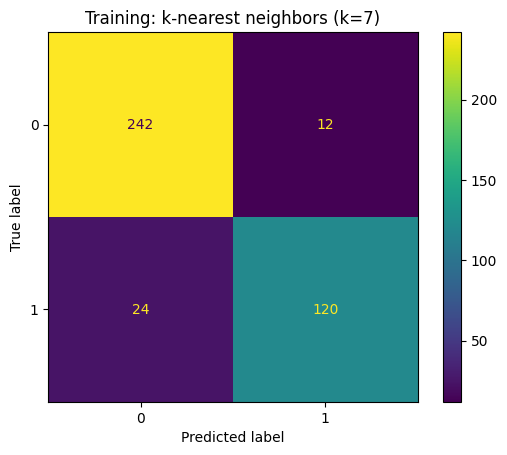

Accuracy: 0.9095477386934674
Precision: 0.9090909090909091
Recall: 0.8333333333333334


In [13]:
# Fit k-nearest neighbors with k=7

# YOUR CODE GOES HERE

clf = KNeighborsClassifier(n_neighbors=7)

clf.fit(X_train_scaled, y_train)

predictions = clf.predict(X_train_scaled)

# Confusion matrix

# YOUR CODE GOES HERE

cm = confusion_matrix(y_train, predictions)

cmTrain_plot = ConfusionMatrixDisplay(cm)

cmTrain_plot.plot()
cmTrain_plot.ax_.set_title("Training: k-nearest neighbors (k=7)")
plt.show()

# Calculate accuracy, precision, and recall

# YOUR CODE GOES HERE

TN, FP, FN, TP = cm.ravel()

accuracy = (TP + TN) /(TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

c:\Users\vijay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


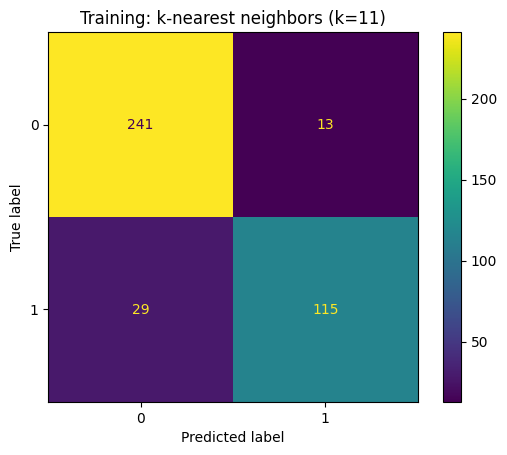

Accuracy: 0.8944723618090452
Precision: 0.8984375
Recall: 0.7986111111111112


In [14]:
# Fit k-nearest neighbors with k=11

# YOUR CODE GOES HERE

clf = KNeighborsClassifier(n_neighbors=11)

clf.fit(X_train_scaled, y_train)

predictions = clf.predict(X_train_scaled)

# Confusion matrix

# YOUR CODE GOES HERE

cm = confusion_matrix(y_train, predictions)

cmTrain_plot = ConfusionMatrixDisplay(cm)

cmTrain_plot.plot()
cmTrain_plot.ax_.set_title("Training: k-nearest neighbors (k=11)")
plt.show()

# Calculate accuracy, precision, and recall

# YOUR CODE GOES HERE

TN, FP, FN, TP = cm.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

**Support Vector Classification Based on Radius and Texture**  


Support vector machines (SVMs) are an alternative classification model that, similar to k-nearest neighbors, relies on choosing specific hyperparameters. These hyperparameters are values that define variations within a machine learning model. While k-nearest neighbors involves the hyperparameter k (number of neighbors), SVMs have multiple hyperparameters, such as the kernel function and the slope of the loss function.  


**Your task is to fit three support vector classifiers using different basis functions.**


c:\Users\vijay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


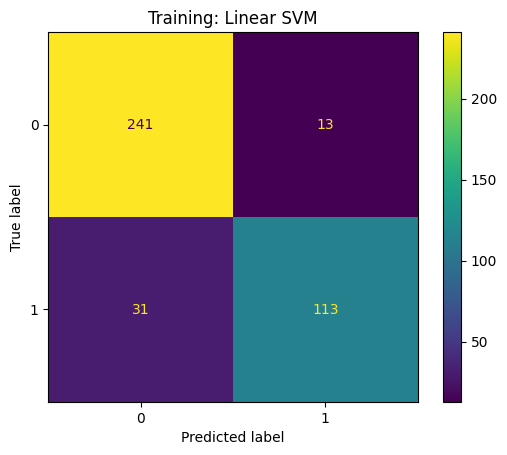

Accuracy: 0.8894472361809045
Precision: 0.8968253968253969
Recall: 0.7847222222222222


In [15]:
# Fit SVM with the linear kernel

# YOUR CODE GOES HERE

clf = SVC(kernel='linear')

clf.fit(X_train_scaled, y_train)

predictions = clf.predict(X_train_scaled)

# Confusion matrix

# YOUR CODE GOES HERE

cm = confusion_matrix(y_train, predictions)
cmTrain_plot = ConfusionMatrixDisplay(cm)

cmTrain_plot.plot()
cmTrain_plot.ax_.set_title("Training: Linear SVM")
plt.show()

# Calculate accuracy, precision, and recall

# YOUR CODE GOES HERE

TN, FP, FN, TP = cm.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

c:\Users\vijay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


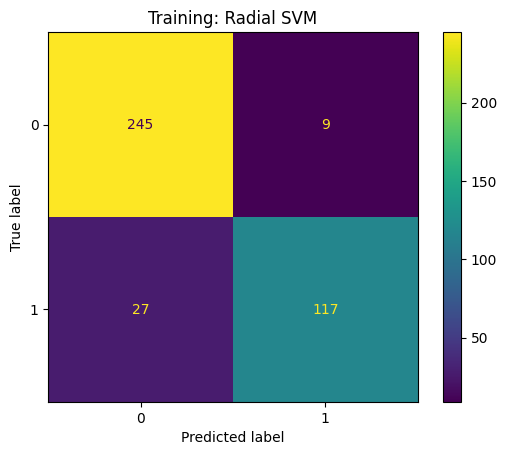

Accuracy: 0.9095477386934674
Precision: 0.9285714285714286
Recall: 0.8125


In [16]:
# Fit SVM with the Radial Basis Function kernel

# YOUR CODE GOES HERE

clf = SVC()

clf.fit(X_train_scaled, y_train)

predictions = clf.predict(X_train_scaled)

# Confusion matrix

# YOUR CODE GOES HERE

cm = confusion_matrix(y_train, predictions)
cmTrain_plot = ConfusionMatrixDisplay(cm)


cmTrain_plot.plot()
cmTrain_plot.ax_.set_title("Training: Radial SVM")
plt.show()

# Calculate accuracy, precision, and recall

# YOUR CODE GOES HERE

TN, FP, FN, TP = cm.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

c:\Users\vijay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


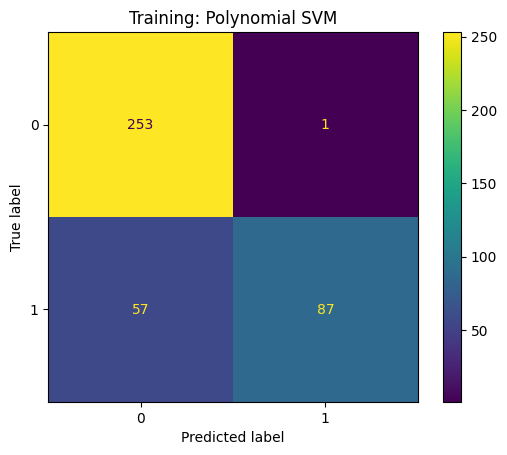

Accuracy: 0.8542713567839196
Precision: 0.9886363636363636
Recall: 0.6041666666666666


In [17]:
# Fit SVM with the polynomial kernel

# YOUR CODE GOES HERE

clf = SVC(kernel='poly')

clf.fit(X_train_scaled, y_train)

predictions = clf.predict(X_train_scaled)

# Confusion matrix

# YOUR CODE GOES HERE

cm = confusion_matrix(y_train, predictions)

cmTrain_plot = ConfusionMatrixDisplay(cm)

cmTrain_plot.plot()
cmTrain_plot.ax_.set_title("Training: Polynomial SVM")
plt.show()

# Calculate accuracy, precision, and recall

# YOUR CODE GOES HERE

TN, FP, FN, TP = cm.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)